<a href="https://colab.research.google.com/github/praveen-science/Comparative-Study-of-Prediction-Models/blob/main/LSTM_based_RNN_model_for_stock_price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Stock Price Prediction Using RNN - LSTM

In [ ]:
#### Dataset Link : https://finance.yahoo.com/quote/GOOG/history

Sample questions :
1.  What is a Recurrent Neural Network(RNN)?
2.  Normalize data to 0-1 range.
3.  What is a vanishing gradient when using RNNs?
4.  What is exploding gradient descent in Deep Learning?
5.  What is the difference between RNN and LSTM?
6.  Data structure creation-create a sliding window to cover 60-time stamps
7.  What Is Dropout and Batch Normalization?
8.  What Are the Applications of a Recurrent Neural Network (RNN)?
9.  Buil a  LSTM architecture  
10. Compile and Train the Model
11. Make prediction and visulaise the result.
12. What is LSTM? Explain Architecture Of LSTM in detail.

```
# This is formatted as code
```




____

## 1. Data processing

### 1.1 Import data

In [ ]:
# importing required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [ ]:
data=pd.read_csv('GOOG.csv',date_parser=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3105 entries, 0 to 3104
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3105 non-null   object 
 1   Open       3105 non-null   float64
 2   High       3105 non-null   float64
 3   Low        3105 non-null   float64
 4   Close      3105 non-null   float64
 5   Adj Close  3105 non-null   float64
 6   Volume     3105 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 169.9+ KB


In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-01-03,209.894836,216.427353,207.758728,216.208771,216.208771,26413000
1,2006-01-04,220.515762,223.029404,218.454163,221.181427,221.181427,30771600
2,2006-01-05,221.558975,224.316040,219.323517,224.162048,224.162048,21757200
3,2006-01-06,226.958847,233.729813,225.155579,231.325455,231.325455,35744800
4,2006-01-09,231.698029,235.170441,228.980698,231.941452,231.941452,25750100


In [ ]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3989,24-06-2020,1461.510010,1475.420044,1429.750000,1431.969971,1431.969971,1756000
3990,25-06-2020,1429.900024,1442.900024,1420.000000,1441.329956,1441.329956,1230500
3991,26-06-2020,1431.390015,1433.449951,1351.989990,1359.900024,1359.900024,4267700
3992,29-06-2020,1358.180054,1395.599976,1347.010010,1394.969971,1394.969971,1810200
3993,30-06-2020,1390.439941,1418.650024,1383.959961,1413.609985,1413.609985,2041600


In [ ]:
data_training=data[data['Date']<'2019-01-01'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-01-03,209.894836,216.427353,207.758728,216.208771,216.208771,26413000
1,2006-01-04,220.515762,223.029404,218.454163,221.181427,221.181427,30771600
2,2006-01-05,221.558975,224.316040,219.323517,224.162048,224.162048,21757200
3,2006-01-06,226.958847,233.729813,225.155579,231.325455,231.325455,35744800
4,2006-01-09,231.698029,235.170441,228.980698,231.941452,231.941452,25750100
...,...,...,...,...,...,...,...
3100,2018-04-27,1046.000000,1049.500000,1025.589966,1030.050049,1030.050049,1619800
3101,2018-04-30,1030.010010,1037.000000,1016.849976,1017.330017,1017.330017,1671300
3102,2018-05-01,1013.659973,1038.469971,1008.210022,1037.310059,1037.310059,1427900
3103,2018-05-02,1028.099976,1040.389038,1022.869995,1024.380005,1024.380005,1603100


In [ ]:
data_test=data[data['Date']>='2019-01-01'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume


##1. What is a Recurrent Neural Network(RNN)?

In [ ]:
data_training=data_training.drop(['Date','Adj Close'],axis=1)
data_training.head()

,Open,High,Low,Close,Volume
0,209.894836,216.427353,207.758728,216.208771,26413000
1,220.515762,223.029404,218.454163,221.181427,30771600
2,221.558975,224.316040,219.323517,224.162048,21757200
3,226.958847,233.729813,225.155579,231.325455,35744800
4,231.698029,235.170441,228.980698,231.941452,25750100


##2. Normalize data to 0-1 range.

### 1.2 Feature scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)

In [ ]:
data_training

array([[0.07592535, 0.07844898, 0.08093166, 0.08427922, 0.31905554],
       [0.08607025, 0.08471828, 0.09112625, 0.08902434, 0.37172095],
       [0.0870667 , 0.08594007, 0.09195489, 0.09186857, 0.26279903],
       ...,
       [0.84366571, 0.85906038, 0.84389912, 0.86780889, 0.01715801],
       [0.85745851, 0.86088272, 0.85787259, 0.85547048, 0.01927497],
       [0.8487664 , 0.85070872, 0.84206899, 0.85484065, 0.02179913]])

##3. What is a vanishing gradient when using RNNs?

##4. What is exploding gradient descent in Deep Learning?

##5. What is the difference between RNN and LSTM?

##6. Data structure creation-create a sliding window to cover 60-time stamps

### 1.3 Data structure creation

Important step to create a sliding window! A special data structure is needed to cover 60-time stamps, based on which RNN will predict the 61st price. Here the number of past timestamps is set to 60 based on experimentation. Thus, X_train is a nested list, which contains lists of 60 time-stamp prices. y_train is a list of stock prices which is the next day stock price, corresponding to each list in X_train. Specifically,

In [ ]:
X_train = []
y_train = []

data_training.shape[0]

3105

In [ ]:
for i in range(60, data_training.shape[0]):

    X_train.append(data_training[i-60: i])
    y_train.append(data_training[i, 0])


In [ ]:
 X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train.shape, y_train.shape

((3045, 60, 5), (3045,))

## 1.4 Data reshaping

In [ ]:
#X_train = np.reshape(X_train, newshape = (X_train.shape[0], X_train.shape[1], 1))

##7. What Is Dropout and Batch Normalization?

##8 What Are the Applications of a Recurrent Neural Network (RNN)?

---



##9.  Buil a  LSTM architecture  

## 2. Model building
### RNN model (Deep-Learning)

In [ ]:
#import Tensorflow library

from tensorflow.keras import Sequential

from tensorflow.keras.layers import Dense,LSTM,Dropout


In [ ]:
# initialize the model

regressor = Sequential()

#add the 1st LSTM layer with the Dropout layer having rate=0.2, units=50 , Activation= relu
regressor.add(LSTM(units = 50,activation='relu',return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(rate = 0.2))

##add 2nd lstm layer with the Dropout layer having rate=0.3 , units=60 , Activation= relu
regressor.add(LSTM(units = 60,activation='relu', return_sequences = True))
regressor.add(Dropout(rate = 0.3))

##add 3rd lstm layer with the Dropout layer having rate=0.4 , units=80 , Activation= relu
regressor.add(LSTM(units = 80,activation='relu', return_sequences = True))
regressor.add(Dropout(rate = 0.4))

##add 4th lstm layer with the Dropout layer having rate=0.5 , units=120.
regressor.add(LSTM(units = 120, return_sequences = False))
regressor.add(Dropout(rate = 0.5))

#output layer. The output dimension is 1 since we are predicting 1 price each time.
regressor.add(Dense(units = 1))


In [ ]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            11200     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            26640     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

##10. Compile and Train the Model

## 3. Model compiling

In [ ]:
regressor.compile(optimizer ='adam', loss = 'mean_squared_error')

## 4. Model fitting

In [ ]:
regressor.fit(x = X_train, y = y_train, batch_size = 32, epochs = 20)

Epoch 1/20
96/96 [==============================] - 24s 182ms/step - loss: 0.0090
Epoch 2/20
96/96 [==============================] - 17s 182ms/step - loss: 0.0031
Epoch 3/20
96/96 [==============================] - 17s 176ms/step - loss: 0.0032
Epoch 4/20
96/96 [==============================] - 17s 180ms/step - loss: 0.0031
Epoch 5/20
96/96 [==============================] - 17s 180ms/step - loss: 0.0030
Epoch 6/20
96/96 [==============================] - 17s 178ms/step - loss: 0.0020
Epoch 7/20
96/96 [==============================] - 17s 175ms/step - loss: 0.0024
Epoch 8/20
96/96 [==============================] - 18s 183ms/step - loss: 0.0020
Epoch 9/20
96/96 [==============================] - 18s 190ms/step - loss: 0.0019
Epoch 10/20
96/96 [==============================] - 18s 188ms/step - loss: 0.0022
Epoch 11/20
96/96 [==============================] - 18s 190ms/step - loss: 0.0021
Epoch 12/20
96/96 [==============================] - 18s 188ms/step - loss: 0.0018
Epoch 13/20
9

## 5. Model prediction
### 5.1 Import test data



In [ ]:
data_test=data[data['Date']>='2019-01-01'].copy()
data_training=data[data['Date']<'2019-01-01'].copy()

In [ ]:
# Data processing

data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume


In [ ]:
past_60_days=data_training.tail(60)

we need to concatenate the train and test datasets for prediction, because we use the previous 60 days’ stock prices to predict the next-day price. In another word, we need the 60 days’ price before the 1st date in the test dataset.

In [ ]:
df=past_60_days.append(data_test,ignore_index=True)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-07,1081.540039,1081.780029,1048.260010,1048.579956,1048.579956,2369200
1,2018-02-08,1055.410034,1058.619995,1000.659973,1001.520020,1001.520020,2859100
2,2018-02-09,1017.250000,1043.969971,992.559998,1037.780029,1037.780029,3505900
3,2018-02-12,1048.000000,1061.500000,1040.927979,1051.939941,1051.939941,2057700
4,2018-02-13,1045.000000,1058.369995,1044.087036,1052.099976,1052.099976,1265100


In [ ]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,1081.540039,1081.780029,1048.260010,1048.579956,2369200
1,1055.410034,1058.619995,1000.659973,1001.520020,2859100
2,1017.250000,1043.969971,992.559998,1037.780029,3505900
3,1048.000000,1061.500000,1040.927979,1051.939941,2057700
4,1045.000000,1058.369995,1044.087036,1052.099976,1265100


### 5.2 Data processing

In [ ]:
inputs=scaler.transform(df)

In [ ]:
#create the test data structure

X_test = []
y_test = []
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60: i])
    y_test.append(inputs[i, 0])


In [ ]:
X_test = np.array(X_test)
y_test= np.array(y_test)
X_test.shape,y_test.shape

((0,), (0,))

In [ ]:
##.11 Make prediction and visulaise the result. (10 Marks)

### 5.3 Model prediction

In [ ]:
predicted_stock_price = regressor.predict(X_test)

ValueError: ignored

In [ ]:
predicted_stock_price

NameError: ignored

In [ ]:
scaler.scale_

array([6.77662810e-04, 6.75025317e-04, 6.78610578e-04, 6.77106900e-04,
       1.21162775e-08])

In [ ]:
scale=1/6.77662810e-04
scale

1475.660144312774

In [ ]:
#we have predicted is the scaled values, so we need to reverse the prediction.

predicted_stock_price = predicted_stock_price*scale
y_test=y_test*scale
predicted_stock_price

array([[1154.2089],
       [1115.116 ],
       [1054.7189],
       ...,
       [1172.8417],
       [1163.1667],
       [1144.9116]], dtype=float32)

## 6. Result visualization

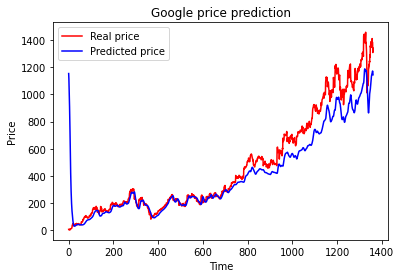

In [ ]:
plt.plot(y_test, color = 'red', label = 'Real price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted price')
plt.title('Google price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

##. What is LSTM? Explain Architecture Of LSTM in detail.